In [17]:
import pandas as pd
import numpy as np

from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score,f1_score,confusion_matrix,balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.calibration import CalibratedClassifierCV as SVCclbr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
#from TweetVect import TweetVect

from sklearn.preprocessing import StandardScaler, QuantileTransformer,PowerTransformer,MinMaxScaler,MaxAbsScaler,RobustScaler

import joblib

In [18]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 3000)
df01=pd.read_csv(r'C:\Users\tekin\Desktop\ML\Tweedy\BsnsCntVctUsnm_D1911.csv',index_col=False)
df01.head(10)

,edInput,editor,usScName,text
0,1,5004,business,By_business state link Chinese hack group use malware steal sms text message high rank military government target accord cybersecurity company
1,1,5004,Inc,By_inc Developing empathy compassion daily habit
2,1,5004,BW,By_bw argentine startup want build better bee
3,1,5004,business,By_business South Korean export fall 11th straight month October global trade gloom persist
4,1,5004,business,By_business Oil set weekly drop rise Saudi output trade woe
5,1,5004,Inc,By_inc Hiring hard way find identify true star employee
6,1,5004,business,By_business Qantas ground three Boeing 737 jet find crack near wing
7,1,5004,HarvardBiz,By_harvardbiz true believer power democratic politic make big important change want play personal role that
8,1,5004,Inc,By_inc New research prove kill make strong really true @mindazetlin
9,1,5004,HarvardBiz,By_harvardbiz female lead company get early funding world would better off


In [19]:
SEED=7
np.random.seed(SEED)
y_vect=np.array(df01.edInput)
text_vect=np.array(df01.text[:].values)

In [20]:
X_train, X_test, y_train, y_test =train_test_split(text_vect,
            y_vect,random_state=SEED,test_size=0.1,stratify=y_vect)

In [21]:
print(X_test[23])

By_businessinsider Trump preside ' big strategic defeat US since early day ww2 European ally ignore threat back Huawei



class TweetVect(CountVectorizer):
    def __init__(self,max_features=1500,ngram_range=(1,5),tokenizer=None,token_pattern='\S+',min_df=1,lowercase=False,stop_words=None):
        super().__init__(tokenizer=None,token_pattern='\S+',\
                    min_df=1,lowercase=False,stop_words=None,ngram_range=ngram_range,max_features=max_features)
    def fit(self, X, y=None):

        self.fit_transform(X)
        return self

    def fit_transform(self,X,y=None):
         return super().fit_transform(X).toarray()

    def transform(self,X,y=None):
        return super().transform(X).toarray()

lemma_vect =  CountVectorizer(tokenizer=None,token_pattern='\S+',
                             min_df=1,lowercase=False,stop_words=None,ngram_range=(1,5),max_features=4000)
X_train=lemma_vect.fit_transform(X_train_raw)
X_test=lemma_vect.transform(X_test_raw)

In [22]:
def specificity(y_true, y_pred):
    spcfc= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return spcfc
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]



myscoring = {'accuracy' : make_scorer(accuracy_score),
             'balanced_acc': make_scorer(balanced_accuracy_score),
             'specificity' : make_scorer(specificity),  
           'precision' : make_scorer( precision_score),
           'f1_score' : make_scorer(f1_score),
            'tp': make_scorer(tp), 'tn': make_scorer(tn),
            'fp': make_scorer(fp), 'fn': make_scorer(fn)}



In [23]:
negative = len(y_vect[y_vect==0])
positive = len(y_vect[y_vect==1])
print(negative,'\n',positive)
total = negative + positive
weight_for_0 = (1 / negative)*(total)/2.0 
weight_for_1 = (1 / positive)*(total)/2.0
#weight_for_1 = 100

scale_pos_weight = negative/positive
num_round = 2

4664 
 8807


In [24]:
from sklearn.linear_model import LogisticRegression as LC

In [25]:
X_train, X_test, y_train, y_test =train_test_split(text_vect,
            y_vect,random_state=SEED,test_size=0.1,stratify=y_vect)
vect=CountVectorizer(max_features=4000,ngram_range=(1,5),tokenizer=None,token_pattern='\S+',min_df=1,lowercase=False,stop_words=None)
X_train=vect.fit_transform(X_train)
X_train=X_train.toarray()
scl=MinMaxScaler()
X_train=scl.fit_transform(X_train)
clf3 = LinearSVC(class_weight = 'balanced',C=0.01, max_iter=10000)
clfLC=LC(class_weight = 'balanced',C=0.01)                

clf3.fit(X_train,y_train)
clfLC.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
X_test=vect.transform(X_test)
X_test=X_test.toarray()
X_test=scl.transform(X_test)
print(clf3.score(X_test,y_test))
clfLC.score(X_test,y_test)

0.7826409495548962


0.7203264094955489

In [27]:
print("Test-set score with lemma: {:.5f}".format(clf3.score(X_test,y_test)))
y_pred = clf3.predict(X_test)
print("Best specificty: {:.5f}".format(specificity(y_test,y_pred)))
print("Best balanced accuracy: {:.5f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Best precision: {:.5f}".format(precision_score(y_test,y_pred)))
print("Best f1_score: {:.5f}".format(f1_score(y_test,y_pred)))
#print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('tn,fp,fn,tp:',tn,fp,fn,tp)


Test-set score with lemma: 0.78264
Best specificty: 0.83512
Best balanced accuracy: 0.79497
Best precision: 0.89623
Best f1_score: 0.81947
tn,fp,fn,tp: 390 77 216 665


In [28]:
print("Test-set score with lemma: {:.5f}".format(clfLC.score(X_test,y_test)))
y_pred = clfLC.predict(X_test)
print("Best specificty: {:.5f}".format(specificity(y_test,y_pred)))
print("Best balanced accuracy: {:.5f}".format(balanced_accuracy_score(y_test,y_pred)))
print("Best precision: {:.5f}".format(precision_score(y_test,y_pred)))
print("Best f1_score: {:.5f}".format(f1_score(y_test,y_pred)))
#print(confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('tn,fp,fn,tp:',tn,fp,fn,tp)


Test-set score with lemma: 0.72033
Best specificty: 0.84582
Best balanced accuracy: 0.74981
Best precision: 0.88889
Best f1_score: 0.75343
tn,fp,fn,tp: 395 72 305 576


In [29]:
calibrated = SVCclbr(clf3, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
np.set_printoptions(precision=2, threshold=np.inf)
#print(calibrated.predict_proba(X_test)[:,1])

#inpTech=[' #userexperience #ux heart #digitaltransformation @rautsan read #digital #innovation #ai #artificialintelligence #ml #machinelearning #deeplearning #dl Cc @dpatil @hackingdata']


In [30]:
joblib.dump(vect,r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\BusinessVect.pkl')
joblib.dump(scl,r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\BusinessScale.pkl')

joblib.dump(clf3,r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\BusinessLnrSVC.pkl')
joblib.dump(calibrated,r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\BusinessCalib.pkl')


['C:\\Users\\tekin\\Desktop\\ML\\Tweedy\\deploy\\BusinessCalib.pkl']

In [31]:
del vect,scl,clf3,calibrated
vect=joblib.load(r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\BusinessVect.pkl')
scl=joblib.load(r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\BusinessScale.pkl')
clf3=joblib.load(r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\BusinessLnrSVC.pkl')
calibrated=joblib.load(r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\BusinessCalib.pkl')

In [32]:
inpTech=['@rautsan read #digital #innovation #ai #artificialintelligence #ml #machinelearning #deeplearning #dl Cc @dpatil @hackingdata']

inpTech=['By_businessinsider car enthusiast love peelable paint']
#inpTech=["By_businessinsider Trump preside ' big strategic defeat US since early day ww2 European ally ignore threat back Huawei"]
#inpTech=["a b c d "]
inp1=vect.transform(inpTech)
inp1=inp1.toarray()
inp=scl.transform(inp1)
prbSVC=calibrated.predict_proba(inp)
#prbSVCsg=calibrate1.predict_proba(inp)
#prbcalib=calib.predict_proba(inp)
#prbLC=calibrate2.predict_proba(inp)
resSVC=clf3.predict(inp)
clbSVCres=calibrated.predict(inp)
#clbLCres=calibrate2.predict(inp)
#clbSVCsigres=calibrate1.predict(inp)
#calibres=calib.predict(inp)
print("resSVC,prbSVC,clbSVCres:",resSVC,prbSVC,clbSVCres)
#print(calibrated.score(X_test,y_test))
#print(clf3.score(X_test,y_test))

resSVC,prbSVC,clbSVCres: [0] [[0.6 0.4]] [0]


In [111]:
np.set_printoptions(threshold=np.inf)
print(prb)

[[1.54826e-02 9.84517e-01]
 [1.26861e-02 9.87314e-01]
 [1.30379e-01 8.69621e-01]
 [1.26577e-01 8.73423e-01]
 [1.14777e-02 9.88522e-01]
 [2.11338e-02 9.78866e-01]
 [8.28728e-02 9.17127e-01]
 [5.38482e-02 9.46152e-01]
 [2.42363e-01 7.57637e-01]
 [5.48875e-02 9.45113e-01]
 [5.28490e-03 9.94715e-01]
 [8.20438e-02 9.17956e-01]
 [2.60634e-02 9.73937e-01]
 [3.54505e-03 9.96455e-01]
 [4.09799e-02 9.59020e-01]
 [3.40382e-01 6.59618e-01]
 [5.62026e-03 9.94380e-01]
 [2.83598e-02 9.71640e-01]
 [6.45258e-03 9.93547e-01]
 [4.30768e-02 9.56923e-01]
 [3.00037e-01 6.99963e-01]
 [4.64221e-02 9.53578e-01]
 [2.03062e-01 7.96938e-01]
 [2.31224e-01 7.68776e-01]
 [2.19291e-01 7.80709e-01]
 [8.28728e-02 9.17127e-01]
 [3.17630e-02 9.68237e-01]
 [3.23559e-01 6.76441e-01]
 [5.41242e-03 9.94588e-01]
 [8.15496e-02 9.18450e-01]
 [1.33556e-02 9.86644e-01]
 [9.75574e-02 9.02443e-01]
 [4.72148e-02 9.52785e-01]
 [1.56692e-03 9.98433e-01]
 [4.31901e-02 9.56810e-01]
 [3.25149e-02 9.67485e-01]
 [2.57056e-02 9.74294e-01]
 

In [369]:
calibrated = SVCclbr(clf3, method='isotonic', cv='prefit')
calibrate1 = SVCclbr(clf3, method='sigmoid', cv='prefit')
calibrate2 = SVCclbr(clfLC, method='sigmoid', cv='prefit')
calib= SVCclbr(clf3, method='isotonic', cv=10)
calibrated.fit(X_train, y_train)
calibrate1.fit(X_train, y_train)
calibrate2.fit(X_train, y_train)
calib.fit(X_train, y_train)
# predict probabilities
#print(calibrated.predict_proba(X_test)[:,1])

#inpTech=[' #userexperience #ux heart #digitaltransformation @rautsan read #digital #innovation #ai #artificialintelligence #ml #machinelearning #deeplearning #dl Cc @dpatil @hackingdata']


CalibratedClassifierCV(base_estimator=LinearSVC(C=0.01, class_weight='balanced',
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=10000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=10, method='isotonic')

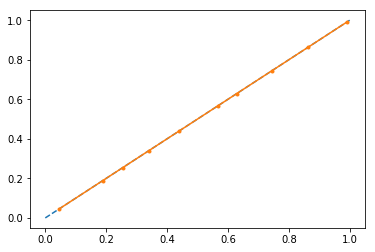

In [185]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
# predict probabilities
probs = calibrated.predict_proba(X_test)[:, 1]
probs2=calibrate2.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_train, probtrn, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score)
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(C=1, solver='lbfgs')
nb = GaussianNB()
svc = SVC(max_iter=10000,probability =True)

clf_list=[lr,nb,svc]
for clfs in clf_list:
    clf = CalibratedClassifierCV(clfs,method='isotonic',cv=5)
    clf.fit(X_train,y_train)
    pos_prob = clf.predict_proba(X_test)[:,1]
    sortedY,sortedYhat=outputsort(y_test,pos_prob)
    print(clf)
    calib_plot(sortedY,sortedYhat,10000)
    clf_score = brier_score_loss(y_test, pos_prob, pos_label=y.max())
    print('Brier Score: '+str(clf_score))
    print('='*70)

In [10]:
joblib.dump(pipe2,r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\TechnologySVCPipe.pkl')

['C:\\Users\\tekin\\Desktop\\ML\\Tweedy\\deploy\\TechnologySVCPipe.pkl']

In [14]:
clfTech=joblib.load(r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\TechnologySVCPipe.pkl')
clfBsns=joblib.load(r'C:\Users\tekin\Desktop\ML\Tweedy\deploy\BusinessSVCPipe.pkl')

In [38]:
#del prb1,prb2
inpBsns=['By_statistacharts US import 2.66 million light vehicle worth total 52.6 billion #mexico plus another59.4 billion worth part via @commercegov #mexicotariffs']
inpTech=['By_ronald_vanloon #userexperience #ux heart #digitaltransformation @rautsan read #digital #innovation #ai #artificialintelligence #ml #machinelearning #deeplearning #dl Cc @dpatil @hackingdata']
inp=['not any is']
prb1=clfBsns.predict(inpBsns)
prb2=clfTech.predict(inpTech)
clbprdc
print(prb1)
prb2

[0]


array([0], dtype=int64)

In [37]:
x=pipe2.steps
print(x)

[('vect', TweetVect(lowercase=False, max_features=1500, min_df=1, ngram_range=(1, 5),
          stop_words=None, token_pattern='\\S+', tokenizer=None)), ('prep', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classifier', SVC(C=0.001, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='rbf', max_iter=3000, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False))]


In [49]:
xx=pipe2.score(X_train,y_train)
print(xx)

0.11087946876689059


In [15]:



clf1 = SVCclbr()
clf2=

clf.fit(X_train, y_train_all,
        eval_set=[(X_train, y_train_all), (X_test, y_test)],
        verbose=True)

evals_result = clf.evals_result()




#{'validation_0': {'logloss': ['0.604835', '0.531479']},
#'validation_1': {'logloss': ['0.41965', '0.17686']}}




[0]	validation_0-error:0.35255	validation_1-error:0.35979
[1]	validation_0-error:0.35057	validation_1-error:0.38056
[2]	validation_0-error:0.31354	validation_1-error:0.34421
[3]	validation_0-error:0.34018	validation_1-error:0.34867
[4]	validation_0-error:0.34835	validation_1-error:0.35460
[5]	validation_0-error:0.33185	validation_1-error:0.33680
[6]	validation_0-error:0.32946	validation_1-error:0.33309
[7]	validation_0-error:0.32987	validation_1-error:0.33309
[8]	validation_0-error:0.32649	validation_1-error:0.33160
[9]	validation_0-error:0.32723	validation_1-error:0.33160
[10]	validation_0-error:0.32805	validation_1-error:0.33309
[11]	validation_0-error:0.31411	validation_1-error:0.32493
[12]	validation_0-error:0.31164	validation_1-error:0.32493
[13]	validation_0-error:0.31172	validation_1-error:0.32418
[14]	validation_0-error:0.30529	validation_1-error:0.31825
[15]	validation_0-error:0.30273	validation_1-error:0.31306
[16]	validation_0-error:0.30182	validation_1-error:0.31454
[17]	va

[139]	validation_0-error:0.20911	validation_1-error:0.23813
[140]	validation_0-error:0.20894	validation_1-error:0.23739
[141]	validation_0-error:0.20779	validation_1-error:0.23665
[142]	validation_0-error:0.20770	validation_1-error:0.23665
[143]	validation_0-error:0.20746	validation_1-error:0.23665
[144]	validation_0-error:0.20729	validation_1-error:0.23591
[145]	validation_0-error:0.20696	validation_1-error:0.23516
[146]	validation_0-error:0.20680	validation_1-error:0.23516
[147]	validation_0-error:0.20680	validation_1-error:0.23516
[148]	validation_0-error:0.20688	validation_1-error:0.23516
[149]	validation_0-error:0.20647	validation_1-error:0.23516
[150]	validation_0-error:0.20639	validation_1-error:0.23591
[151]	validation_0-error:0.20539	validation_1-error:0.23591
[152]	validation_0-error:0.20515	validation_1-error:0.23591
[153]	validation_0-error:0.20474	validation_1-error:0.23591
[154]	validation_0-error:0.20424	validation_1-error:0.23516
[155]	validation_0-error:0.20375	validat

[276]	validation_0-error:0.17694	validation_1-error:0.22181
[277]	validation_0-error:0.17694	validation_1-error:0.22255
[278]	validation_0-error:0.17727	validation_1-error:0.22329
[279]	validation_0-error:0.17669	validation_1-error:0.22329
[280]	validation_0-error:0.17685	validation_1-error:0.22255
[281]	validation_0-error:0.17636	validation_1-error:0.22255
[282]	validation_0-error:0.17644	validation_1-error:0.22255
[283]	validation_0-error:0.17595	validation_1-error:0.22181
[284]	validation_0-error:0.17611	validation_1-error:0.22255
[285]	validation_0-error:0.17611	validation_1-error:0.22255
[286]	validation_0-error:0.17537	validation_1-error:0.22478
[287]	validation_0-error:0.17504	validation_1-error:0.22404
[288]	validation_0-error:0.17471	validation_1-error:0.22404
[289]	validation_0-error:0.17413	validation_1-error:0.22404
[290]	validation_0-error:0.17397	validation_1-error:0.22552
[291]	validation_0-error:0.17388	validation_1-error:0.22329
[292]	validation_0-error:0.17372	validat

In [45]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Regulariza

In [50]:
help(SVCclbr)

Help on class CalibratedClassifierCV in module sklearn.calibration:

class CalibratedClassifierCV(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin, sklearn.base.MetaEstimatorMixin)
 |  Probability calibration with isotonic regression or sigmoid.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  With this class, the base_estimator is fit on the train set of the
 |  cross-validation generator and the test set is used for calibration.
 |  The probabilities for each of the folds are then averaged
 |  for prediction. In case that cv="prefit" is passed to __init__,
 |  it is assumed that base_estimator has been fitted already and all
 |  data is used for calibration. Note that data for fitting the
 |  classifier and for calibrating it must be disjoint.
 |  
 |  Read more in the :ref:`User Guide <calibration>`.
 |  
 |  Parameters
 |  ----------
 |  base_estimator : instance BaseEstimator
 |      The classifier whose output decision function needs to be cali